In [11]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image,ImageDraw
import random
import torch.utils.data as Data
import models

In [134]:
def plot(data):
    plt.imshow(data.cpu(),vmin=0, vmax=1)
def gen(size,num):
    result={'x':[],'y':[]}
    r1=3
    r2=1
    n=3
    s=4
    for j in range(num):
        x=[random.randrange(s,size-s)for i in range(n)]
        y=[random.randrange(s,size-s)for i in range(n)]
        
        img=Image.new(size=(size,size),mode='L')
        draw=ImageDraw.Draw(img)
        for i in range(n):
            draw.ellipse((x[i]-r2, y[i]-r2, x[i]+r2, y[i]+r2), fill=(255))
        result['x'].append(img)
        
        img=Image.new(size=(size,size),mode='L')
        draw=ImageDraw.Draw(img)
        for i in range(n):
            draw.ellipse((x[i]-r1, y[i]-r1, x[i]+r1, y[i]+r1), fill=(100))
        result['y'].append(img)
        
    return result

class ImgDataset(Data.Dataset):
    def im2tensor(self,im):
        return torch.tensor([np.array(im)]).float()/256.0
    def __init__(self,imgs):
        self.x=imgs['x']
        self.y=imgs['y']
    def __len__(self):
        return len(self.x)
    def __getitem__(self, i):
        return self.im2tensor(self.x[i]),self.im2tensor(self.y[i])

In [186]:
model=models.UNet()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = .01)

In [187]:
dataset=ImgDataset(gen(32,100))
loader=Data.DataLoader(
    dataset=dataset,      # torch TensorDataset format
    batch_size=5,      # mini batch size
    shuffle=True 
)

lossRec=[]

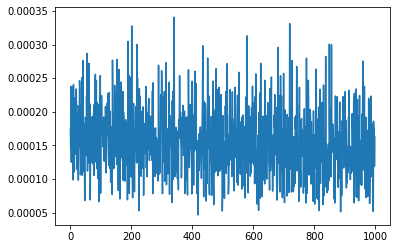

In [204]:
model.train()
for epoch in range(30):
    for step,data in enumerate(loader):
        x,y=data
        optimizer.zero_grad()
        y_pred = model(x)
        #print(y_pred.size())
        loss = criterion(y_pred, y)
        lossRec.append(loss.item())
        loss.backward()
        optimizer.step()
plt.plot(lossRec[-1000:-1])

In [202]:
optimizer = torch.optim.SGD(model.parameters(), lr = 1)

In [105]:
for step,data in enumerate(loader): 
    x,y=data
    break

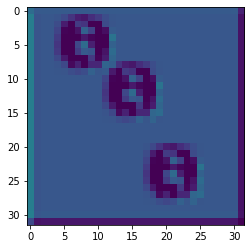

In [229]:
plot(model.up2(model.down2(model.down1(x)))[1][0].detach().squeeze())

In [33]:
import importlib
importlib.reload(models)

<module 'models' from 'D:\\eri24816\\mlp\\models.py'>

In [19]:
model

UNet(
  (down1): Sequential(
    (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (down2): Sequential(
    (0): Conv2d(2, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (up2): Sequential(
    (0): ConvTranspose2d(3, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (up1): Sequential(
    (0): ConvTranspose2d(4, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (final): Sequential(
    (0): Sigmoid()
  )
)

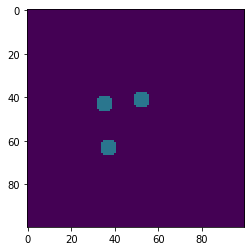

In [139]:
plot(d['y'][2].detach().squeeze())

In [230]:
model

UNet(
  (down1): Sequential(
    (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (down2): Sequential(
    (0): Conv2d(2, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (up2): Sequential(
    (0): ConvTranspose2d(3, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (up1): Sequential(
    (0): ConvTranspose2d(4, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (final): Sequential(
    (0): Sigmoid()
  )
)